Carrega as bibliotecas, busca os dados e faz a leitura.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Permite exibir gráficos diretamente no Jupyter Notebook ou IPython shell output.
%matplotlib inline

# Busca dos dados.
url="https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/DadoseDecisoes.csv"

# Leitura dos dados.
dados = pd.read_csv(url, index_col=0)

dados

,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office
ID,,,,,,,,,,
1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não
2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim
3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim
4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim
5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não
...,...,...,...,...,...,...,...,...,...,...
226,36,Feminino,RH,3711.26,34,81.89,76.52,9,1,Não
227,21,Feminino,Marketing,2536.32,34,85.63,100.00,0,0,Não
228,43,Feminino,Vendas,5717.90,38,86.55,82.46,12,11,Não


In [3]:
dados.columns

Index(['Idade', 'Gênero', 'Departamento', 'Salário', 'Horas_Trabalhadas',
       'Produtividade', 'Satisfação', 'Tempo_Empresa', 'Cursos_Realizados',
       'Home_Office'],
      dtype='object')

Cálculo da média, mediana e moda, e criação de gráfico de caixa e histograma.

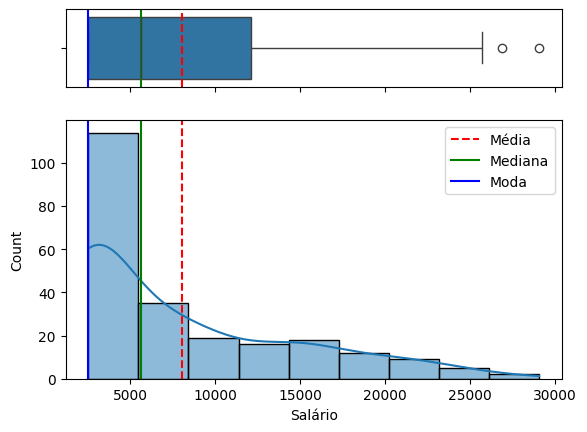

In [4]:
# Cria estrutura de boxplot e histograma.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.3, 1)})

mean=dados['Salário'].mean()
median=dados['Salário'].median()
mode=dados['Salário'].mode().values[0]

# Gráfico de caixa.
sns.boxplot(data=dados, x='Salário', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# Histograma.
sns.histplot(data=dados, x='Salário', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Média")
ax_hist.axvline(median, color='g', linestyle='-', label="Mediana")
ax_hist.axvline(mode, color='b', linestyle='-', label="Moda")

plt.legend()

ax_box.set(xlabel='')
plt.show()

In [5]:
dados['Salário']

ID
1       3848.89
2       2536.32
3       7377.81
4       2536.32
5       2536.32
         ...   
226     3711.26
227     2536.32
228     5717.90
229    15638.38
230     9422.09
Name: Salário, Length: 230, dtype: float64

A mediana foi adotada, porque será utilizado o modelo de regressão logística que se torna adequado quando a resposta é balanceada.

In [6]:
mediana_salario=dados['Salário'].median()

# Cria a variável binária (Salário baixo e alto).
dados['salário']=dados['Salário'].apply(lambda x: 'Alto' if x>=mediana_salario else 'Baixo')
dados.drop('Salário', axis=1)

,Idade,Gênero,Departamento,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office,salário
ID,,,,,,,,,,
1,34,Masculino,RH,36,84.89,94.33,0,4,Não,Baixo
2,39,Feminino,Vendas,48,107.84,98.62,4,9,Sim,Baixo
3,39,Masculino,Marketing,44,95.66,80.23,11,6,Sim,Alto
4,27,Feminino,Vendas,40,88.89,94.63,8,1,Sim,Baixo
5,41,Feminino,Vendas,37,80.97,86.44,11,12,Não,Baixo
...,...,...,...,...,...,...,...,...,...,...
226,36,Feminino,RH,34,81.89,76.52,9,1,Não,Baixo
227,21,Feminino,Marketing,34,85.63,100.00,0,0,Não,Baixo
228,43,Feminino,Vendas,38,86.55,82.46,12,11,Não,Alto


Estatísticas descritivas para variáveis quantitativas.

In [7]:
dados.describe()

,Idade,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,30.547826,8029.973957,38.852174,87.849870,86.149957,6.773913,5.204348
std,8.216762,6556.329700,5.816320,12.238118,12.058364,5.959193,4.219623
min,18.000000,2536.320000,30.000000,65.740000,39.420000,0.000000,0.000000
25%,24.000000,2536.320000,34.000000,77.122500,77.570000,1.000000,2.000000
50%,29.000000,5667.560000,38.000000,87.040000,87.730000,6.000000,5.000000
75%,35.000000,12129.212500,44.000000,98.425000,96.190000,11.000000,8.000000
max,54.000000,29052.820000,48.000000,112.060000,100.000000,30.000000,20.000000


Estatísticas descritivas para variáveis quantitativas condicionado ao salário (dicotomizado).

In [8]:
dados.groupby(by='salário').describe().T

salário                          Alto        Baixo
Idade             count    115.000000   115.000000
                  mean      33.260870    27.834783
                  std        8.506022     6.958436
                  min       19.000000    18.000000
                  25%       27.000000    23.000000
                  50%       33.000000    26.000000
                  75%       39.500000    31.000000
                  max       54.000000    49.000000
Salário           count    115.000000   115.000000
                  mean   13120.488000  2939.459913
                  std     5782.559640   792.906915
                  min     5700.360000  2536.320000
                  25%     8005.115000  2536.320000
                  50%    12181.670000  2536.320000
                  75%    17172.165000  2721.750000
                  max    29052.820000  5634.760000
Horas_Trabalhadas count    115.000000   115.000000
                  mean      40.582609    37.121739
                  std        5.510727     5.616623
                  min       30.000000    30.000000
                  25%       36.500000    32.000000
                  50%       41.000000    36.000000
                  75%       45.500000    41.500000
                  max       48.000000    48.000000
Produtividade     count    115.000000   115.000000
                  mean      91.242261    84.457478
                  std       11.711704    11.852186
                  min       67.360000    65.740000
                  25%       81.720000    75.015000
                  50%       89.920000    82.440000
                  75%      102.270000    93.925000
                  max      112.060000   109.380000
Satisfação        count    115.000000   115.000000
                  mean      83.935130    88.364783
                  std       12.858882    10.809067
                  min       39.420000    55.950000
                  25%       76.080000    80.865000
                  50%       84.490000    91.190000
                  75%       94.015000    99.055000
                  max      100.000000   100.000000
Tempo_Empresa     count    115.000000   115.000000
                  mean       8.982609     4.565217
                  std        6.023321     5.021236
                  min        0.000000     0.000000
                  25%        5.000000     0.000000
                  50%        8.000000     3.000000
                  75%       12.500000     8.000000
                  max       30.000000    23.000000
Cursos_Realizados count    115.000000   115.000000
                  mean       6.330435     4.078261
                  std        4.578213     3.499744
                  min        0.000000     0.000000
                  25%        3.000000     1.000000
                  50%        6.000000     4.000000
                  75%        9.000000     6.000000
                  max       20.000000    15.000000

/tmp/ipykernel_18799/3024375436.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dados['Produtividade'], x=dados['salário'], palette='Set2');


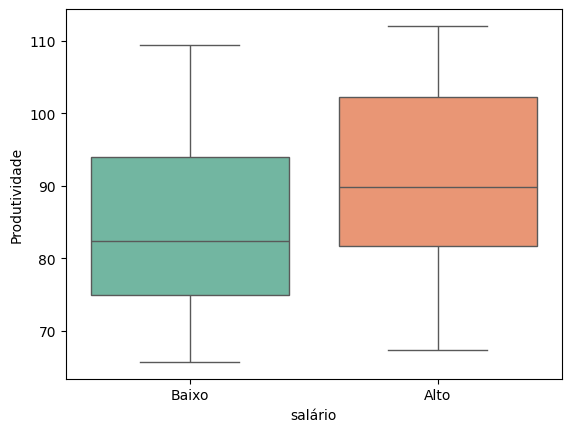

In [9]:
sns.boxplot(y=dados['Produtividade'], x=dados['salário'], palette='Set2');

/tmp/ipykernel_18799/1655321315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, y='Satisfação', x='salário', palette='Set2');


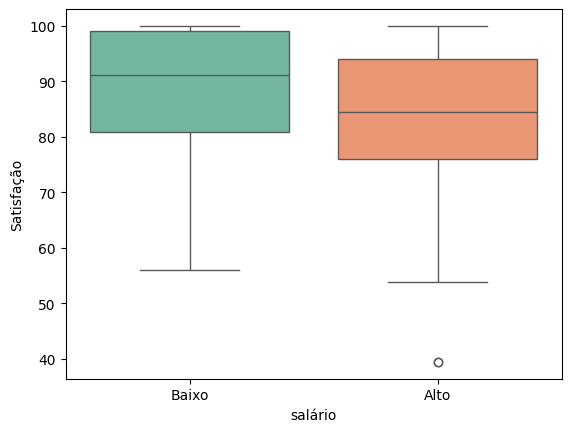

In [10]:
sns.boxplot(data=dados, y='Satisfação', x='salário', palette='Set2');

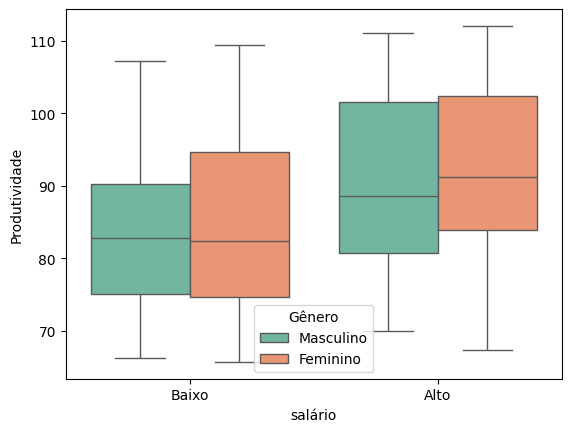

In [11]:
sns.boxplot(data=dados, y='Produtividade', x='salário', hue='Gênero', palette='Set2');

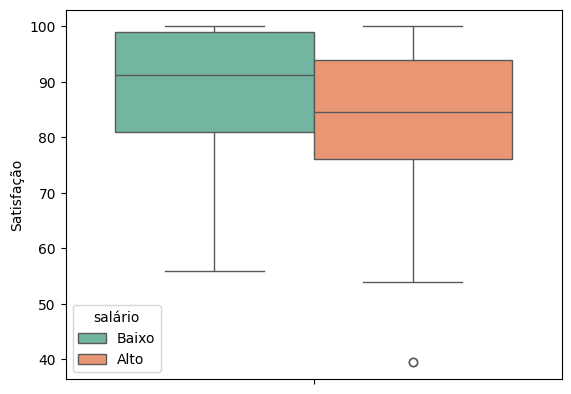

In [12]:
sns.boxplot(y=dados['Satisfação'], hue=dados['salário'], palette='Set2');

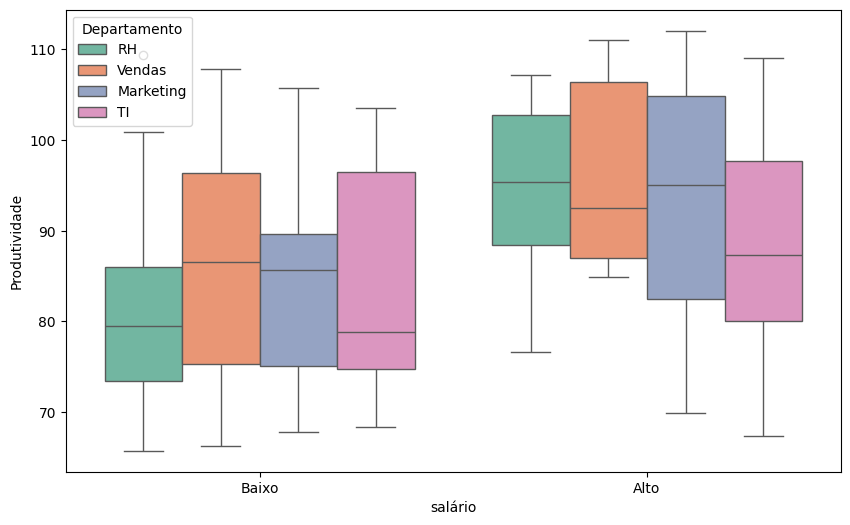

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=dados['Produtividade'], x=dados['salário'], hue=dados['Departamento'], palette='Set2');

Associação entre variáveis qualitativas.

In [14]:
tabela_dupla=pd.crosstab(index=dados['salário'], columns=dados['Gênero'], normalize='index')
tabela_dupla

Gênero,Feminino,Masculino
salário,,
Alto,0.356522,0.643478
Baixo,0.530435,0.469565


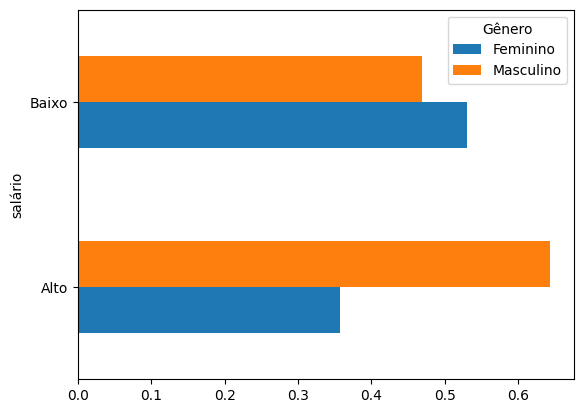

In [15]:
tabela_dupla.plot.barh()
plt.legend(title='Gênero')
plt.show()

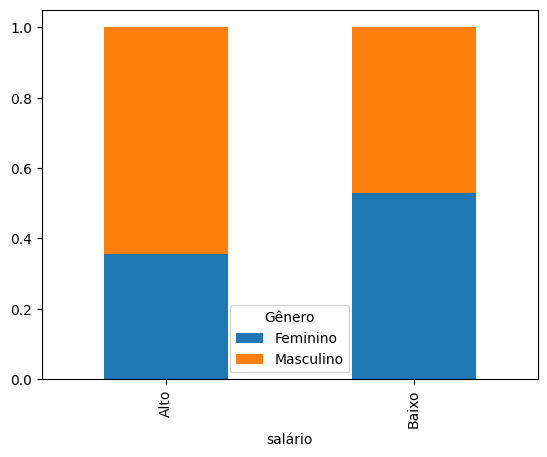

In [16]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Gênero')
plt.show()

In [17]:
tabela_dupla=pd.crosstab(index=[dados['Departamento'], dados['Gênero']], columns=dados['salário'], normalize='index')
tabela_dupla

salário                     Alto     Baixo
Departamento Gênero                       
Marketing    Feminino   0.500000  0.500000
             Masculino  0.620690  0.379310
RH           Feminino   0.230769  0.769231
             Masculino  0.368421  0.631579
TI           Feminino   0.709677  0.290323
             Masculino  0.906977  0.093023
Vendas       Feminino   0.120000  0.880000
             Masculino  0.270270  0.729730

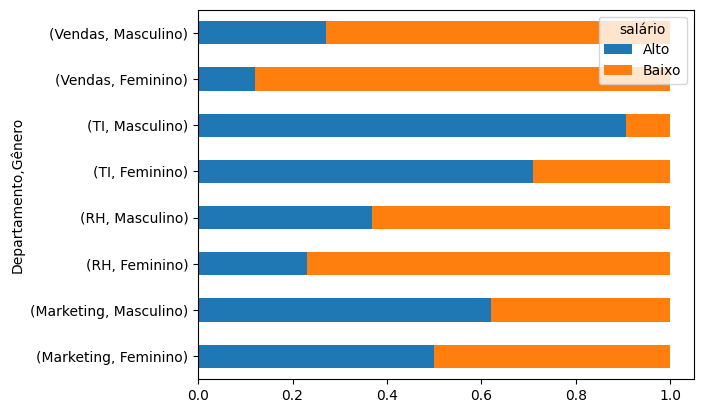

In [18]:
tabela_dupla.plot.barh(stacked=True)
plt.legend(title='salário')
plt.show()

Gráfico de mosaico é para duas variáveis qualitativas.

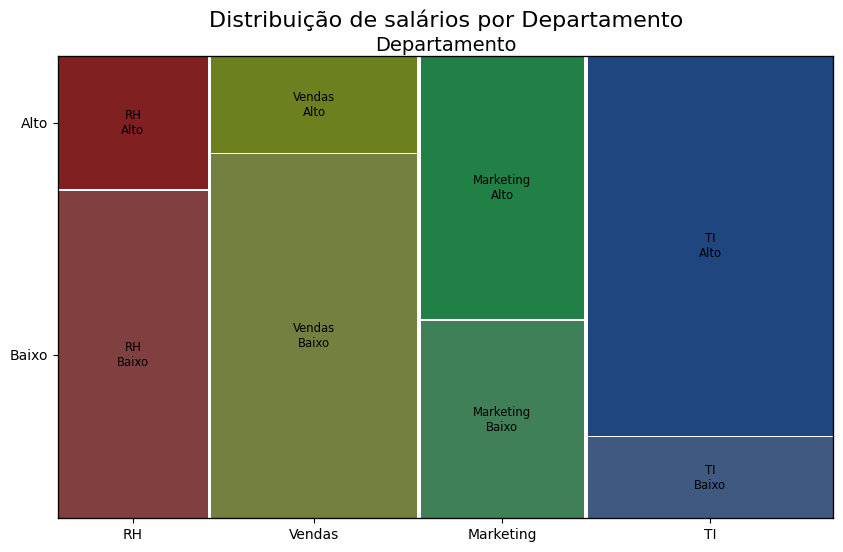

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams["figure.figsize"]=[10,6]
mosaic(dados, ['Departamento', 'salário']);

plt.title("Distribuição de salários por Departamento", fontsize=16)
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Home Office', fontsize=14)

plt.show()

<h1>Associação entre variáveis quantitativas</h1>


Gráfico de dispersão.

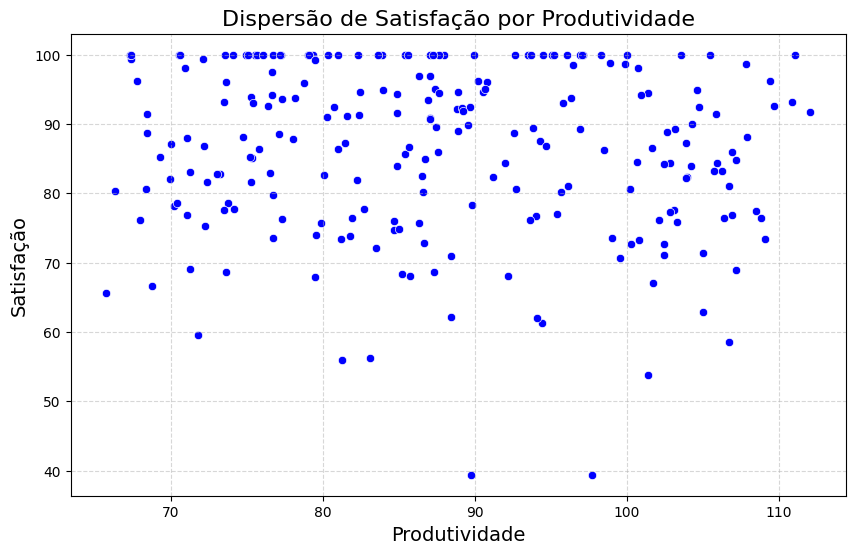

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, y='Satisfação', x='Produtividade', color='blue', alpha=1)
plt.title('Dispersão de Satisfação por Produtividade', fontsize=16)
plt.ylabel('Satisfação', fontsize=14)
plt.xlabel('Produtividade', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Gráricos com reta de Regressão

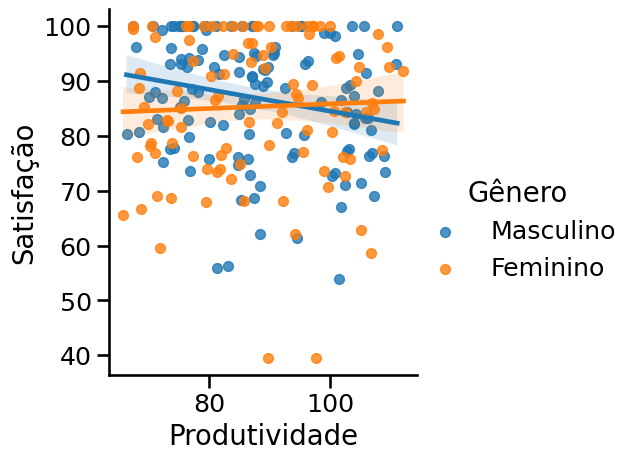

In [21]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero', data=dados, fit_reg=True, scatter_kws={'s': 50});

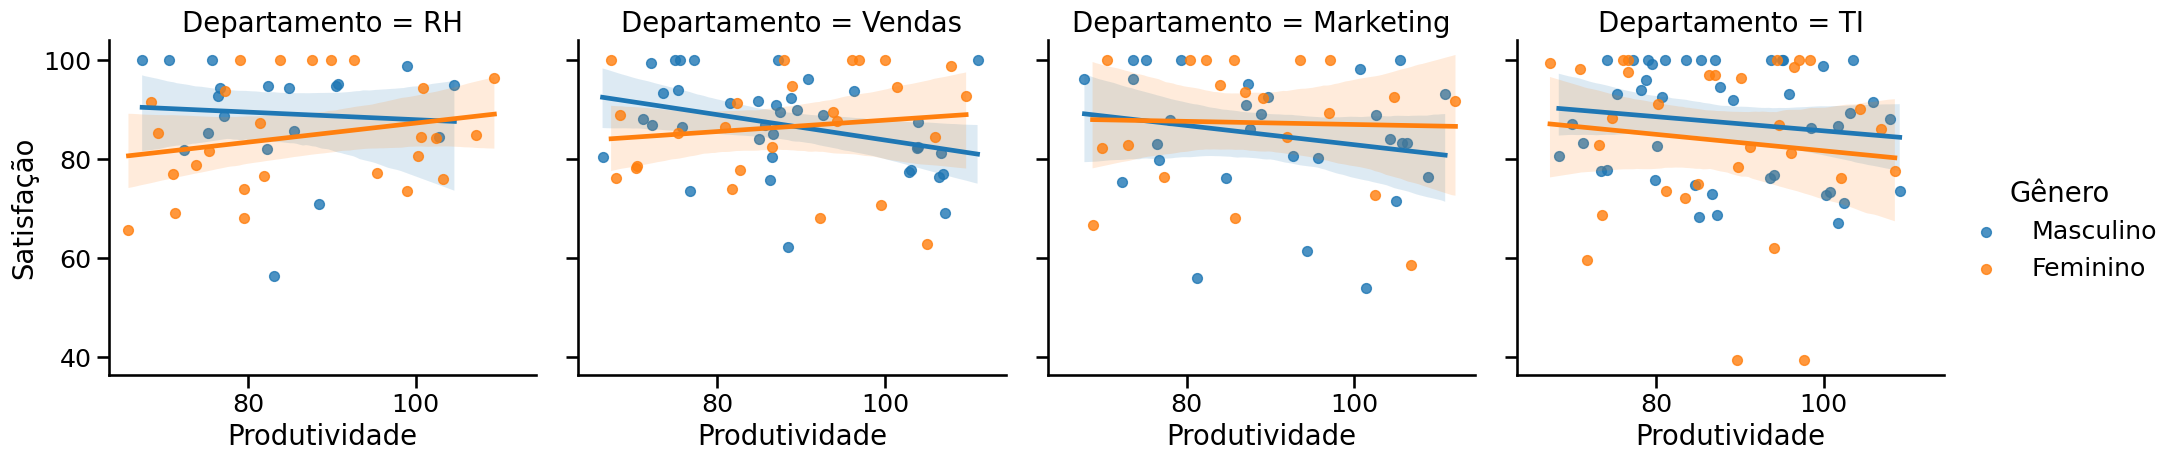

In [22]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero', col='Departamento', data=dados, fit_reg=True, scatter_kws={'s': 50});

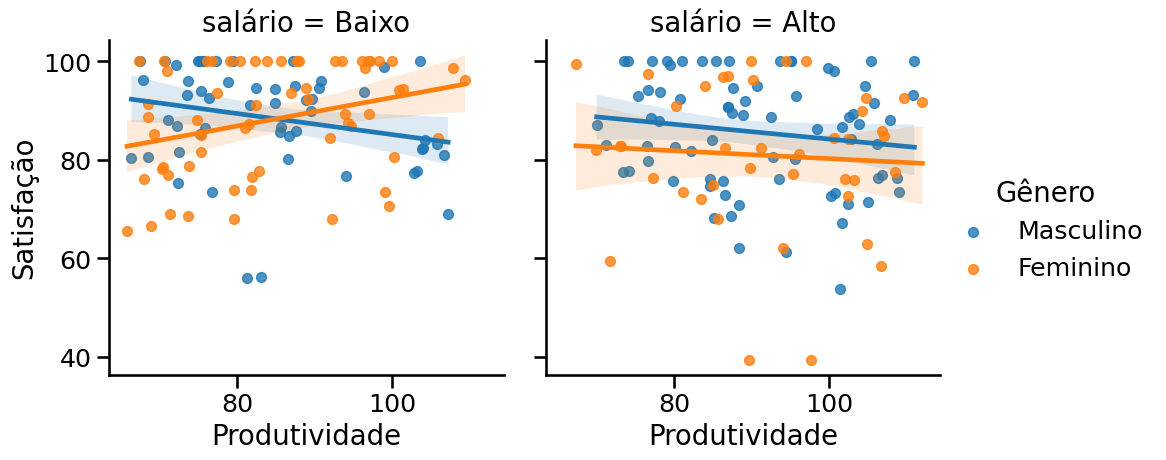

In [23]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero', col='salário', data=dados, fit_reg=True, scatter_kws={'s': 50});

Existe diferença na variável Produtividade para pessoas que têm salários altos e baixos?

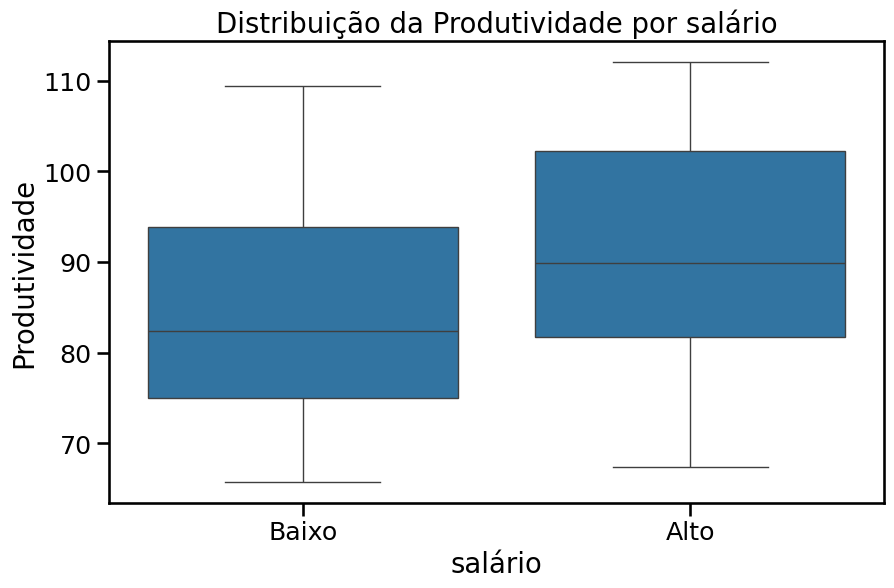

In [24]:
# Primeiro passo: Visualização dos dados

sns.boxplot(x='salário', y='Produtividade', data=dados)
plt.title('Distribuição da Produtividade por salário')
plt.show()

<b>Teste de normalidade Shapiro-Wilk</b>

In [25]:
from scipy import stats

produtividade_s1=dados[dados['salário']=='Alto']['Produtividade']
produtividade_s0=dados[dados['salário']=='Baixo']['Produtividade']

# Teste de normalidade (Shapiro-Wilk)
stat_s1, p_s1=stats.shapiro(produtividade_s1)
stat_nao_s0, p_nao_s0=stats.shapiro(produtividade_s0)

print(f'Teste de normalidade (Shapiro-Wilk) - salário 1: p-value = {np.round(p_s1, 3)}')
print(f'Teste de normalidade (Shapiro-Wilk) - salário 0: p-value = {np.round(p_nao_s0, 3)}')

Teste de normalidade (Shapiro-Wilk) - salário 1: p-value = 0.002
Teste de normalidade (Shapiro-Wilk) - salário 0: p-value = 0.0


Teste de Mann-Whitney e teste t de Student.

In [28]:
# Teste de hipóteses para comparação de médias

# Caso a normalidade seja rejeitada, usamos o teste Mann-Whitney
# Caso não rejeitemos a normalidade, usamos o t de Student
if p_s1<0.05 or p_nao_s0<0.05:
    print("A normalidade foi rejeitada, utilizando o teste de Mann-Whitney")
    stat, p=stats.mannwhitneyu(produtividade_s1, produtividade_s0)
else:
    print("A normalidade não foi rejeitada, utilizando o teste t de Student")
    stat, p=stats.ttest_ind(produtividade_s1, produtividade_s0)

print(f'Estatística de teste: {stat}')
print(f'p-value: {np.round(p, 3)}')

if p_s1<0.05 or p_nao_s0<0.05:
    print("Como rejeitamos a normalidade dos dados, utilizando o teste de Mann-Whitney")
    stat, p=stats.mannwhitneyu(produtividade_s1, np.round(produtividade_s0, 3))
else:
    print("Como não rejeitamos a normalidade dos dados, utilizando o teste t de Student")
    stat, p=stats.ttest_ind(produtividade_s1, np.round(produtividade_s0, 3))

stat, p

if p<0.05:
    print("Rejeitamos H0, o que indica que a produtividade é diferente nos grupos de salário alto e baixo.")
    stat, p
else:
    print("Não rejeitamos H0, o que indica que a produtividade pode ser considerada equivalente nos dois grupos.")
    stat, p

A normalidade foi rejeitada, utilizando o teste de Mann-Whitney
Estatística de teste: 8723.5
p-value: 0.0
Como rejeitamos a normalidade dos dados, utilizando o teste de Mann-Whitney
Rejeitamos H0, o que indica que a produtividade é diferente nos grupos de salário alto e baixo.


Para analisar vária variáveis, utilizamos o modelo de regressão logística.

Antes precisamos criar variáveis dummy para as qualitativas (categóricas)

In [29]:
import statsmodels.api as sm

dados_modelo=pd.get_dummies(dados, columns=['Gênero', 'Departamento', 'Home_Office', 'salário'])

X=dados_modelo[['Gênero_Masculino', 'Departamento_Marketing', 'Departamento_TI', 'Departamento_Vendas', 'Produtividade', 'Home_Office_Sim']]    # Variáveis preditoras.
y=dados_modelo['salário_Alto']  # Variável dependente (resposta)

X=sm.add_constant(X)

In [30]:
X=X.astype(int)
y=y.astype(int)

In [32]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de regressão logística.
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())

In [33]:
result=model.fit()

# Resumo do modelo.
print(result.summary())

# Predição.
y_pred=result.predict(X_test)

# Ponto de corte de 0.5 para classificar como o ou 1.
y_pred_class=(y_pred>0.5).astype(int)

# Avaliar a acurácia.
accuracy=(y_pred_class==y_test).mean()
print(f'Acurácia do modelo: {accuracy:.4f}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:           salário_Alto   No. Observations:                  161
Model:                            GLM   Df Residuals:                      154
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.497
Date:                Thu, 20 Mar 2025   Deviance:                       144.99
Time:                        23:51:07   Pearson chi2:                     141.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7

P valor bem pequeno indica uma significância estatística.


<h2>Interpretação dos coeficientes do modelo de regressão logística: Odds ratio</h2>

Serve para ver o efeito do Gênero no salário Alto e Baixo.

In [34]:
np.exp(1.0370)

np.float64(2.8207420820631355)

In [35]:
np.exp(3.0516)

np.float64(21.14915601567805)

In [36]:
np.exp(0.0780)

np.float64(1.081122658670083)